In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
df=pd.read_csv(r'D:\Data Analytics\Python\Panda\Problem_Solving\ecommerce_clean.csv')

In [3]:
df.head(2)

,Unnamed: 0,index,order_id,order_date,delivered_date,customer_id,customer_name,customer_age,customer_gender,customer_segment,region,state,city,product_id,product_name,category,sub_category,brand,unit_price,quantity,discount_percentage,discount_amount,sales_amount,profit_margin,profit_amount,tax_rate,tax_amount,shipping_cost,shipping_method,total_amount,payment_method,delivery_time_days,order_status,rating,is_repeat_customer,order_year,order_month,order_quarter,order_day_of_week
0,0,0,ORD100722,2020-01-01,2020-01-04,CUST10257,Vikram Kumar,56,Female,Corporate,Central,Madhya Pradesh,Indore,PROD9221,Local Publishers Comics,Books,Comics,Local Publishers,495.34,1,10,49.53,445.80,0.448,199.71,0.12,53.50,56.65,Standard,555.95,Credit Card,3,Delivered,4.5,No,2020,1,Q1,Wednesday
1,1,1,ORD100766,2020-01-14,2020-01-15,CUST10171,Kavita Kumar,57,Male,Consumer,West,Gujarat,Vadodara,PROD6296,Oxford Self-Help,Books,Self-Help,Oxford,1313.37,4,0,0.00,5253.49,0.439,2306.35,0.12,630.42,125.12,Express,6009.03,Debit Card,1,Delivered,5.0,No,2020,1,Q1,Tuesday


### For each brand, calculate what percentage of its orders are from repeat customers (is_repeat_customer == True). Sort descending by percentage.

In [41]:
brand_analysis=df.groupby('brand').agg(
    total_order=('order_id','count'),
    repeat_order=('is_repeat_customer',lambda x:(x=='Yes').sum())
)

brand_analysis['repeat_percent']=round((brand_analysis.repeat_order/brand_analysis.total_order)*100,2)

brand_analysis=brand_analysis.sort_values(by='repeat_percent',ascending=False).reset_index()

### Visualization

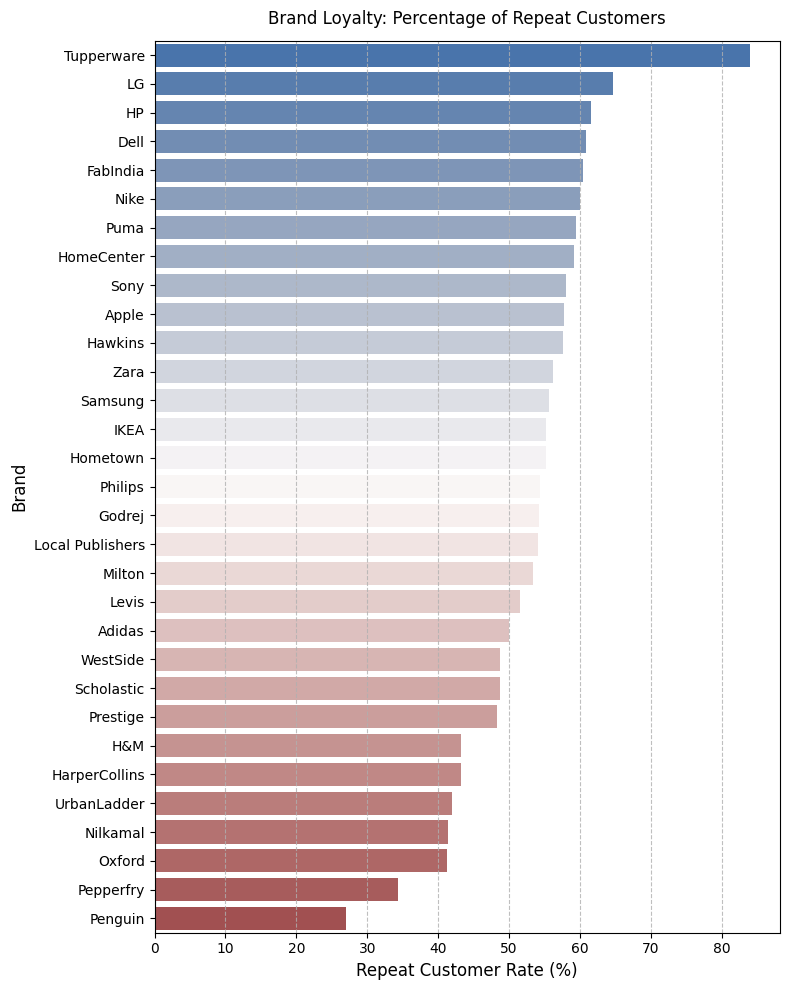

In [64]:
plt.figure(figsize=(8,10))

sns.barplot(
    data=brand_analysis,
    x='repeat_percent',
    y='brand',
    palette='vlag',
    hue='brand'
)

plt.title('Brand Loyalty: Percentage of Repeat Customers', fontsize=12, pad=12)
plt.xlabel('Repeat Customer Rate (%)', fontsize=12)
plt.ylabel('Brand', fontsize=12)
plt.grid(alpha=0.8,linestyle='--',axis='x')
plt.tight_layout()
plt.show()